In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math
from sklearn.datasets.samples_generator import make_blobs

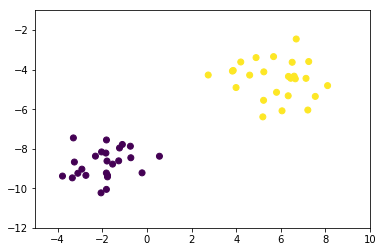

In [11]:
(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

In [12]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}

In [14]:
# all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias

max_feature_value=float('-inf')
min_feature_value=float('+inf')
        
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

In [15]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5
    for lrate in learning_rate:  
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation          
                    correctly_classified = True  
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude    
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate
        norms = sorted([n for n in length_Wvector])   
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        w_optimum = w[0]+lrate*2

In [16]:
SVM_Training(data_dict)

In [17]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [18]:
def visualize(data_dict):
        plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')
        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        plt.axis([-5,10,-12,-1])
        plt.show()

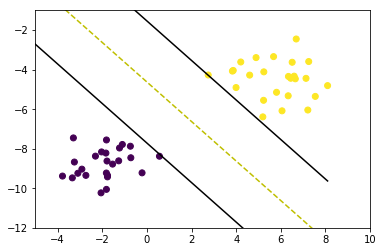

In [19]:
visualize(data_dict)

In [20]:
def predict(features):
        # sign( x.w+b )
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

1,  1,  -1,  1,  -1,  

In [21]:
l=[]
for xi in X:
    
    l.append(predict(xi[:6]))
l=np.array(l).astype(int)
l

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

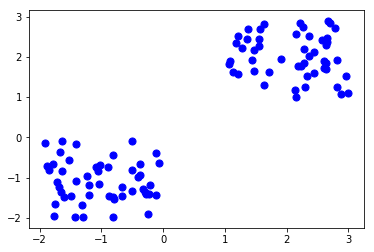

In [24]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [25]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [26]:
Kmean.cluster_centers_

array([[ 2.09416112,  2.02107391],
       [-1.02541333, -1.0899606 ]])

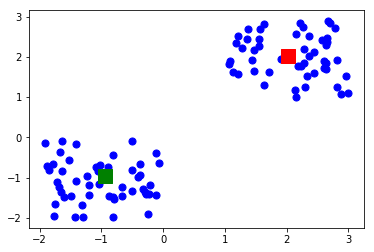

In [27]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
header = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names= header)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [53]:
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [54]:
y_pred = classifier.predict(X_test)

In [58]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",round(result2*100,2))

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy: 96.67


In [59]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


In [60]:
# evaluate lda with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.825 (0.034)


In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=100, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, random_state=102)
clf = AdaBoostClassifier(n_estimators=4, random_state=0, algorithm='SAMME')
clf.fit(X, Y)  

AdaBoostClassifier(algorithm='SAMME', n_estimators=4, random_state=0)

In [62]:
# for regression
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=3,learning_rate=1)
model.fit(X,Y)

# for classification
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X,Y)

GradientBoostingClassifier()

# Chapter 9

In [63]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt#import Data
Data = pd.read_csv('kc_house_data.csv')
Data.head(5).T#get some information about our Data-Set
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\Usama\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


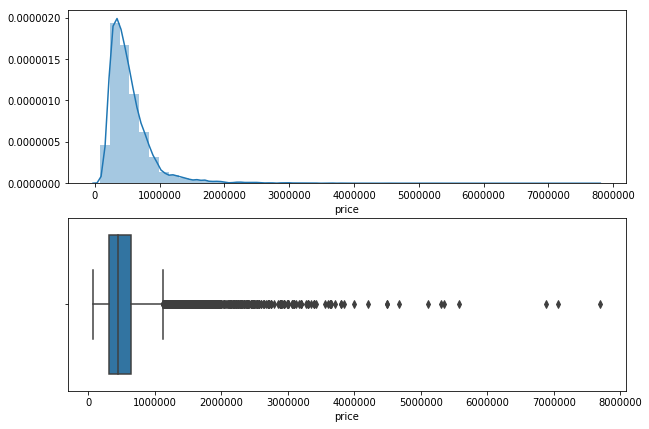

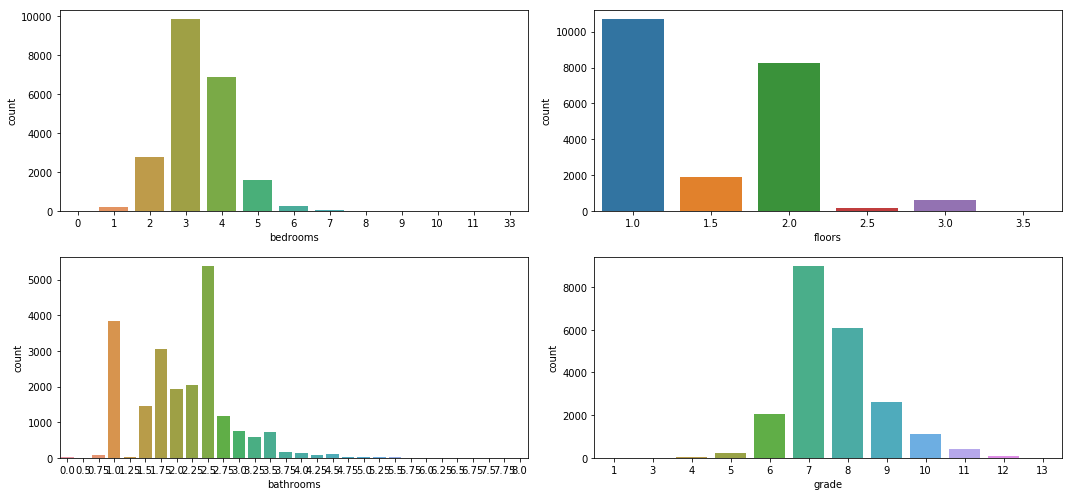

In [65]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()

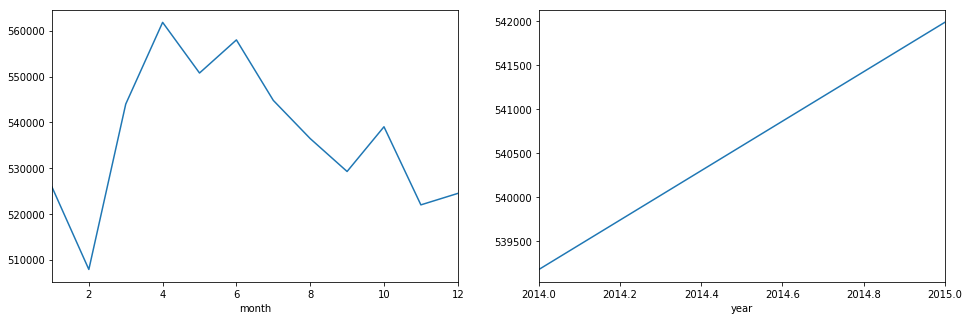

In [66]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [67]:
# check if there are any Null values
Data.isnull().sum()# drop some unnecessary columns
Data = Data.drop('date',axis=1)
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [68]:
X = Data.drop('price',axis =1).values
y = Data['price'].values#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [69]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [70]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)#predicting the test set result
y_pred = regressor.predict(X_test)#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

540068.0331492655
[-32174.2645862   28314.47160234  80960.8365489    6428.24177905
   3413.70406639  49942.35152741  36835.82051685  21903.68879982
 116003.40529456  76073.5117404   25375.83805414 -72994.52529983
   7676.57141888  78057.84710672 -17254.48220907  18909.70160034
 -10301.37920458   4182.48580611  17081.43533197]


,Coefficient
bedrooms,-32174.264586
bathrooms,28314.471602
sqft_living,80960.836549
sqft_lot,6428.241779
floors,3413.704066
waterfront,49942.351527
view,36835.820517
condition,21903.688800
grade,116003.405295
sqft_above,76073.511740


C:\Users\Usama\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


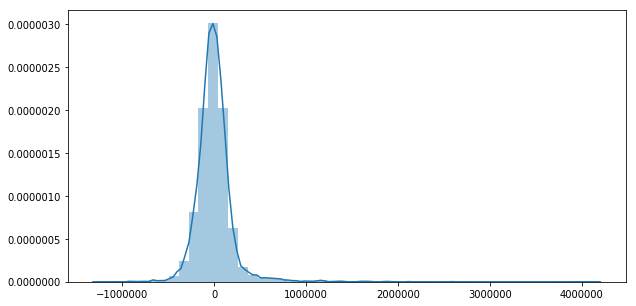

In [71]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [75]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 125933.74319633967
MSE: 40601153229.61855
RMSE: 201497.27846702683
VarScore: 0.7039747986273114


In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [81]:
Data = pd.read_csv('diabetes.csv')

In [82]:
Data.head().transpose() 

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [84]:
Data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [88]:
Data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
X= Data.drop("Outcome",axis=1)
y= Data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [93]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test,y_test)

C:\Users\Usama\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [97]:
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

0.7795275590551181
[[147  15]
 [ 41  51]]


In [103]:
# Import The Libraries
# ! pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np# Import The Dataset
df = pd.read_excel('Online Retail.xlsx')
df = df[df['CustomerID']]# Sample the dataset
df_fix = df.sample(10000, random_state = 42)

In [ ]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler# Initialize the Object
scaler = StandardScaler()# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

In [ ]:
from sklearn.cluster import KMeanssse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroidplt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

# Image Classification

In [105]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [106]:
X, y = mnist_data['data'], mnist_data['target']
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)

Shape of X: (70000, 784) 
 Shape of y: (70000,)


(-0.5, 27.5, 27.5, -0.5)

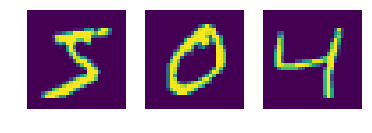

In [107]:
import matplotlib.pyplot as plt
digit = X[0]
digit_pixels = digit.reshape(28, 28)
plt.subplot(131)
plt.imshow(digit_pixels)
plt.axis('off')
digit = X[1]
digit_pixels = digit.reshape(28, 28)
plt.subplot(132)
plt.imshow(digit_pixels)
plt.axis('off')
digit = X[2]
digit_pixels = digit.reshape(28, 28)
plt.subplot(133)
plt.imshow(digit_pixels)
plt.axis('off')

In [108]:
import numpy as np
y = y.astype(np.uint8)
y[2]

4

In [109]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print('Train Data: ', X_train, '\n', 'Test Data:', X_test, '\n','Train label: ', y_train, '\n', 'Test Label: ', y_test)

Train Data:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Test Data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 Train label:  [5 0 4 ... 5 6 8] 
 Test Label:  [7 2 1 ... 4 5 6]


In [110]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [112]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [113]:
score = sgd_clf.score(X_test, y_test)
score

0.874

In [124]:
#import necessary modules
import pandas as pd
header = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names= header)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
iris.head(2)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [126]:
iris.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [127]:
iris.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
Class            object
dtype: object

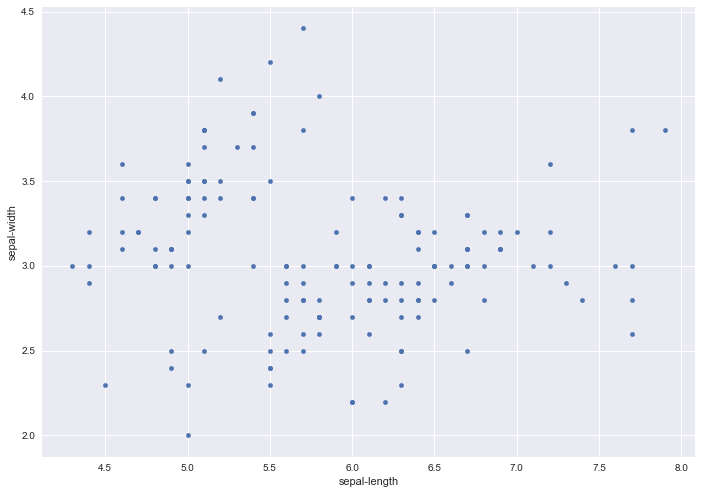

In [131]:
iris.plot(kind="scatter",x="sepal-length",y="sepal-width")
plt.show()

In [132]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()

In [133]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test setsdata_train, 
#data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [134]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [137]:
from sklearn.metrics import accuracy_score